# Book Crossing Recommender System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from surprise import Reader
from surprise import Dataset
from surprise import *

In [2]:
users = pd.read_csv("/Users/malolemagueresse/Documents/GitHub/Datasets/BX-CSV-Dump/BX-Users.csv", sep=';', error_bad_lines=False, encoding="latin-1")
reviews = pd.read_csv("/Users/malolemagueresse/Documents/GitHub/Datasets/BX-CSV-Dump/BX-Book-Ratings.csv", sep=';', error_bad_lines=False, encoding="latin-1")

In [3]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [4]:
reviews.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [5]:
data = pd.merge(users,reviews,on="User-ID",how="inner")

In [6]:
data.drop(columns=["Location","Age"],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 35.1+ MB


<AxesSubplot:>

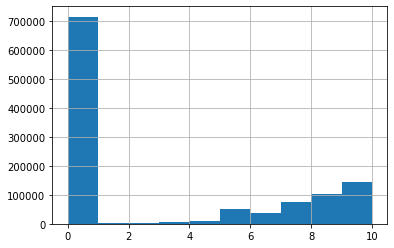

In [8]:
data["Book-Rating"].hist()

In [9]:
data.groupby("ISBN")["Book-Rating"].agg({sum,'count'}).sort_values('count',ascending=False)

,sum,count
ISBN,,
0971880107,2551,2502
0316666343,5787,1295
0385504209,4108,883
0060928336,2524,732
0312195516,3134,723
...,...,...
0801064090,0,1
0801064252,5,1
0801064279,0,1


In [10]:
min_book_ratings = 50
filter_books = data['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = data['User-ID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

data_new = data[(data['ISBN'].isin(filter_books)) & (data['User-ID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(data.shape))
print('The new data frame shape:\t{}'.format(data_new.shape))

The original data frame shape:	(1149780, 3)
The new data frame shape:	(140516, 3)


In [11]:
reader = Reader(rating_scale=(0, 9))
data_2 = Dataset.load_from_df(data_new[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [12]:
data_2

In [ ]:
from surprise import SVD
from surprise import SVDpp
from surprise import SlopeOne
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import NormalPredictor
from surprise import NMF
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering
from surprise import Dataset
from surprise.model_selection import cross_validate

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_2, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    